**1.** Use the pandas function `read_sql_query()` to assign to the variable `df` the DataFrame of results from the following query: 

Select all records from `PlaylistTrack` INNER JOIN `Track` on `PlaylistTrack.TrackId = Track.TrackId` that satisfy the condition `Milliseconds < 250000`.

Use the engine: `engine = create_engine('sqlite:///../data/13. Importando datos en Python/Chinook.sqlite')`

In [1]:
import pandas as pd
from sqlalchemy import create_engine

In [2]:
# Create engine: engine
engine = create_engine('sqlite:///../data/13. Importando datos en Python/Chinook.sqlite')
con = engine.connect()
playlist = con.execute('SELECT * FROM PlaylistTrack INNER JOIN Track on PlaylistTrack.TrackId = Track.TrackId WHERE Milliseconds < 250000')
# Execute query and store records in DataFrame: df
df = pd.DataFrame(playlist.fetchall())
df.columns = playlist.keys()

# Print head of DataFrame
df.head()

,PlaylistId,TrackId,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,3390,3390,One and the Same,271,2,23,None,217732,3559040,0.99
1,1,3392,3392,Until We Fall,271,2,23,None,230758,3766605,0.99
2,1,3393,3393,Original Fire,271,2,23,None,218916,3577821,0.99
3,1,3394,3394,Broken City,271,2,23,None,228366,3728955,0.99
4,1,3395,3395,Somedays,271,2,23,None,213831,3497176,0.99


**2.** Check which `Composer` has the most tracks on the `PlaylistTrack` table.

In [3]:
composer = con.execute('SELECT * FROM PlaylistTrack INNER JOIN Track on PlaylistTrack.TrackId = Track.TrackId GROUP BY Composer ORDER BY COUNT (*) DESC')
df2 = pd.DataFrame(composer.fetchall())
df2.columns = composer.keys()
df2

,PlaylistId,TrackId,TrackId,Name,AlbumId,MediaTypeId,GenreId,Composer,Milliseconds,Bytes,UnitPrice
0,1,3402,3402,"Band Members Discuss Tracks from ""Revelations""",271,3,23,None,294294,61118891,0.99
1,1,1268,1268,01 - Prowler,100,1,6,Steve Harris,236173,5668992,0.99
2,1,2926,2926,Zoo Station,232,1,1,U2,276349,9056902,0.99
3,1,2665,2665,Heart Of Stone,216,1,1,Jagger/Richards,164493,5329538,0.99
4,1,1986,1986,Intro,163,1,1,Kurt Cobain,52218,1688527,0.99
...,...,...,...,...,...,...,...,...,...,...,...
848,1,1251,1251,New Frontier,98,1,13,Adrian Smith/Bruce Dickinson/Nicko McBrain,304509,12181632,0.99
849,1,567,567,Tradição,45,1,7,Adalto Magalha/Lourenco,269165,9114880,0.99
850,1,3357,3357,OAM's Blues,267,5,2,Aaron Goldberg,266936,4292028,0.99
851,1,2589,2589,Hard To Handle,210,1,6,A.Isbell/A.Jones/O.Redding,206994,6786304,0.99


---
Let's work now with the notebook `35. Screapeando datos con Python`. First check if all libraries are installed. If not, use:

`!pip install beautifulsoup4`

`!pip install requests`

**3.** Let's use what we learnt to scrap the next url. Try to get a final pandas dataframe called `df` with he values that you need.

In [4]:
import re
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [13]:
# Specify url: url
url = 'https://www.dolarhoy.com/'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Extract the response as html: html_doc
html_doc = r.text

# Create a BeautifulSoup object from the HTML: soup
soup = BeautifulSoup(html_doc)

print(soup)

<!DOCTYPE html>

<html lang="es-ar">
<head>
<meta charset="utf-8"/>
<title>Dólar hoy, Cotización del dólar, precio del dolar | Dolarhoy.com</title>
<meta content="Seguí la cotización del dolar minuto a minuto, conocé el precio del dolar en Dolarhoy.com" name="description">
<meta content="" name="keywords"/>
<meta content="DolarHoy" name="author"/>
<meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>
<link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0-alpha.6/css/bootstrap.min.css" integrity="sha384-rwoIResjU2yc3z8GV/NPeZWAv56rSmLldC3R/AZzGRnGxQQKnKkoFVhFQhNUwEyJ" rel="stylesheet"/>
<link href="/Content/Site.css?v=1" rel="stylesheet">
<link href="/Content/img/favicon.png" rel="icon"/>
<link href="https://fonts.googleapis.com/css?family=Open+Sans:300,300i,400,400i,600,600i,700" rel="stylesheet"/>
<link href="https://fonts.googleapis.com/css?family=Raleway:700" rel="stylesheet"/>
<link href="https://maxcdn.bootstrapcdn.com/

In [32]:
table = []
pattern = '\d+\,\d+' # find a regex pattern for numbers with decimals (,)
for sub_link in soup.find_all('div', {'class' : 'pill pill-coti'}):
    currency_name = sub_link.a.get('href').replace("/cotizacion","cotizacion_")
    subtable = [currency_name]
    
    for p in sub_link.find_all('span', {'class' : 'price'}):
        currency_value = re.findall(pattern, p.text)
        subtable.append(currency_value)
    table.append(subtable)

In [33]:
headers = ['moneda','compra','venta']
df = pd.DataFrame(table, columns=headers)
df

,moneda,compra,venta
0,cotizacion_dolaroficial,"[79,14]","[86,12]"
1,cotizacion_dolarblue,"[155,00]","[161,00]"
2,cotizacion_dolarbolsa,"[148,00]","[148,10]"
3,cotizacion_dolarcontadoconliqui,"[150,70]","[150,77]"
4,cotizacion_dolarturista,"[141,08]",None


**4.** Try to replicate what we did on the previous excercise, but now we will try to get all the values from the tables `Distintas cotizaciones del Dólar` and `Cotizaciones de otras monedas`.

In [57]:
table = []
for sub_link in soup.find_all('div', {'class' : 'table-responsive'}):
    for col in sub_link.find_all('td'):
        try:
            subtable = [col.a.get('href')]
        except:
            subtable.append(re.findall(pattern, col.text)[0])
        if len(subtable) == 2:
            table.append(subtable)

In [58]:
headers = ['moneda','compra','venta']
df = pd.DataFrame(table, columns=headers)
df

,moneda,compra,venta
0,/cotizacion-dolar-banco-nacion,"79,50","85,50"
1,/cotizacion-dolar-blue,"155,00","161,00"
2,/cotizacion-dolar-mayorista,"80,36","80,36"
3,/cotizacion-dolar-bolsa,"148,00","148,10"
4,/cotizacion-dolar-contado-con-liquidacion,"150,70","150,77"
5,/cotizacion-euro,"85,85","92,06"
6,/cotizacion-real-brasileno,"12,53","14,04"
7,/cotizacion-peso-uruguayo,"1,70","1,95"
8,/cotizacion-peso-chileno,"0,07","0,09"


---
**5.** Use `tweepy` and create a wordcloud with the last 50 tweets from `@elonmusk`. Install the following library:

`!pip install wordcloud`

In [61]:
import tweepy
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [63]:
# Store OAuth authentication credentials in relevant variables
access_token = "1952916806-9WbU9ROPLd4aVPprQZqWJhaW4RSXrBw4oK8A4Ow"
access_token_secret = "gW5iuYPtrTxVhPmQxBemsKz6jCAOqbYx1fT0ewKHFyAkG"
consumer_key = "46pvnSwIVylfWepbPsP4433wL"
consumer_secret = "xWDPHaUkk0ub93qj1DaYgJcO8QtkPUhNFIE7uBAvzbSVLLpLzR"

# Pass OAuth details to tweepy's OAuth handler
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token,access_token_secret)

In [86]:
# get tweets from a given user
def get_tweets(user, limit=10):
    results = api.user_timeline(screen_name=user , count=limit , tweet_mode='extended' )
    tweets = [] # tweet list initially empty
    for r in results :
        # uses regular expression to remove the tweet's URL
        # http takes the start of the url
        # \ S + takes non-white characters (the end of the URL) 
        tweet = re.sub( r'http\S+', '' , r.full_text )
        tweets.append(tweet.replace('\n', '')) # add to list
    return tweets  # returns the list of tweets

In [99]:
# create an api object
api  =  tweepy.API(auth)

# write tweets to a file 'tweets.txt'
f = open('tweets.txt',"w")
x = get_tweets("@elonmusk")
y = str(x)
f.write(y)
f.close()

In [100]:
df = pd.DataFrame(x, columns=['tweet'])
df.head()

,tweet
0,@EvaFoxU @PPathole @mirojurcevic @TashaARK @Sp...
1,@enn_nafnlaus @mirojurcevic @TashaARK @Space_S...
2,@PPathole @mirojurcevic @TashaARK @Space_Stati...
3,@mirojurcevic @TashaARK This is a misperceptio...
4,@PhilippeCROIZON @SpaceX One day we will fly y...


In [102]:
text = ' '.join(df['tweet'])
print("There are {} words in all tweets.".format(len(x)))

There are 10 words in all tweets.


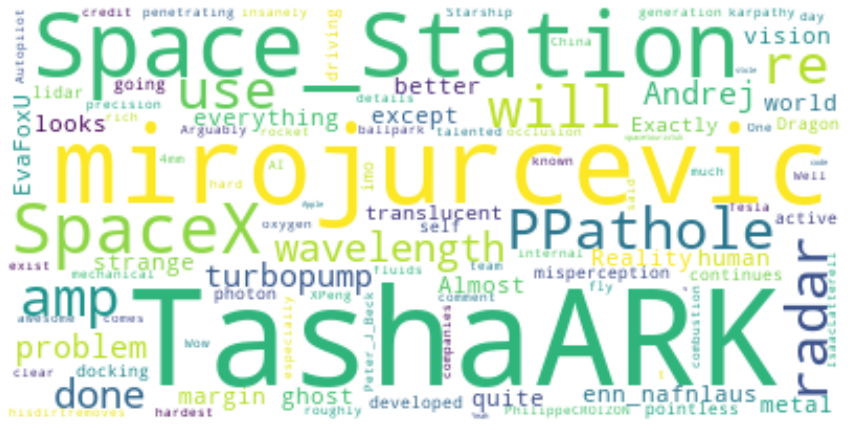

In [103]:
stopwords = set(STOPWORDS)
stopwords.update(['https', ',', 'rt',])

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

# Display the generated image:
plt.figure(figsize=(15,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()